In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/NCKH Depression'
!ls

/content/drive/MyDrive/NCKH Depression
 Code
 Dataset
'FIX TMDT.docx'
'Giấy tờ'
'Khảo sát mức độ trầm cảm (Câu trả lời).gsheet'
'Khảo sát mức độ trầm cảm.gform'
'Model - EM - Expectation Maximization'
 Page
'Project FINALdocx.docx'
'QR Code Form.png'
'Quà '
'Thuyết Minh NCKH 2022.docx'
'Thuyết Minh NCKH 2022 - Tú.docx'
'Tucuteee (Được Tự Phục hồi).docx'
 VNICT
 Website


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Step 1: Import, preprocess.

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/NCKH Depression/Dataset/Education.xlsx')
data.head()

,Họ và tên bạn là gì?,Ngày sinh của bạn là?,Hiện tại bạn là?,Giới tính sinh học của bạn là:,Bạn có thuộc cộng đồng LGBT không?,1. Bạn là người có xu hướng:,2. Bạn có cảm thấy bản thân mình thừa thãi không?,"3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?",4. Bạn đang tự ti?,"5. Bạn có hay vận động thể dục, thể thao không?",...,"1. Bạn đột nhiên ăn quá nhiều hoặc chán ăn, biếng ăn?","2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?","3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?","4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?",5. Bạn không thể tập trung khi làm việc?,"6. Bạn mất tự tin vào bản thân, thất vọng về bản thân và cả gia đình?","7. Bạn luôn cảm thấy chán nản, kiệt sức, tuyệt vọng?",8. Bạn ít thấy hứng thú hoặc không tìm thấy niềm vui trong mọi việc?,"9. Bạn có suy nghĩ tiêu cực, muốn làm tổn thương bản thân thậm chí có suy nghĩ tự sát?",Tổng điểm
0,Phạm Trần Anh Vũ,2003-12-05,Sinh viên năm 1,Nam,Có,Vừa hướng nội vừa hướng ngoại,Một chút,Một chút,Có,Không,...,2.0,1.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,13.0
1,Nguyễn Trung Nguyên,2002-11-09,Sinh viên năm 2,Nam,Không,Chưa xác định được,Không,Không,Một chút,Có,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,11.0
2,Mai Thị Huyền Trang,2003-08-09,Sinh viên năm 1,Nữ,Không,Vừa hướng nội vừa hướng ngoại,Không,Không,Có,Một chút,...,3.0,3.0,1.0,3.0,3.0,1.0,2.0,1.0,0.0,17.0
3,Dương Hồng Mai,2003-03-02,Sinh viên năm 1,Nữ,Không,Hướng ngoại,Một chút,Không,Một chút,Một chút,...,2.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,13.0
4,Nguyễn Đặng Thành Duy,2003-06-17,Sinh viên năm 1,Nam,Không,Vừa hướng nội vừa hướng ngoại,Một chút,Một chút,Một chút,Không,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
data.columns = ['Name', 'DoB', 'Job', 'Sex', 'LGBT', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 
                'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'Total']

$Data$ $Preprocessing$

In [ ]:
# Change values in total column to the rate of depression. Normal - Minimal - Mild - Medium - Severe.
data.Total = data.Total.replace({1: 0, 2: 0, 3: 0, 4: 0,
                                 5: 1, 6: 1, 7: 1, 8: 1, 9: 1,
                                 10: 2, 11: 2, 12: 2, 13: 2, 14: 2,
                                 15: 3, 16: 3, 17: 3, 18: 3, 19: 3,
                                 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4})

'''
# Change values in job column from Sinh vien trung cap to Trung cap nghe
data.Job = data.Job.replace({'Học sinh cấp 3': 0,
                             'Sinh viên trung cấp': 1,
                             'Sinh viên năm 1': 2,
                             'Sinh viên năm 2': 3,
                             'Sinh viên năm 3': 4,
                             'Sinh viên năm 4': 5,
                             'Sinh viên từ năm 4 trở lên': 6,
                             'Đã tốt nghiệp': 7}) '''
# LGBT
data.LGBT = data.LGBT.replace({'Có': 1,
                               'Không': 0,
                               'Chưa xác định': 0.5})
'''
# Sex
data.Sex = data.Sex.replace({'Nam': 1,'Nữ': 0})

# Per - Intro (A)
data.a1 = data.a1.replace({'Hướng ngoại': 1,
                     'Hướng nội': 2,
                     'Chưa xác định được': 0,
                     'Vừa hướng nội vừa hướng ngoại': 1.5}) '''
data.a2 = data.a2.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
data.a3 = data.a3.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
data.a4 = data.a4.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
#data.a5 = data.a5.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
#data.a6 = data.a6.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})

# Question (B)
#data.b6 = data.b1.replace({'Phần lớn dành cho việc vui chơi': 0, 'Cân đối giữa học tập và vui chơi': 0.5, 'Phần lớn dành cho học tập': 1})
data.b15 = data.b15.replace({'Chưa từng': 0, 'Một - hai lần': 1, 'Khoảng năm lần': 2, 'Khoảng 10 lần': 3, 'Rất nhiều': 4, 'Mỗi ngày': 5})

# Fill null value with the most popular value.
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Drop the column Name
data = data.drop(columns=[ 'Name', 'DoB', 'a7', 'a8', 'Job', 'Sex', 'a5', 'a6', 'b5', 'b14','b7', 'b2', 'b9', 'b4', 'b1', 'b3', 'b6', 'a1','b10', 'b12', 'a2', 'a4', 'b15'])

In [ ]:
data.head()

,LGBT,a3,b8,b11,b13,c1,c2,c3,c4,c5,c6,c7,c8,c9,Total
0,1.0,0.5,4.0,3.0,4.0,2.0,1.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0
1,0.0,0.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0
2,0.0,0.0,3.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,2.0,1.0,0.0,3.0
3,0.0,0.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,2.0
4,0.0,0.5,5.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LGBT    291 non-null    float64
 1   a3      291 non-null    float64
 2   b8      291 non-null    float64
 3   b11     291 non-null    float64
 4   b13     291 non-null    float64
 5   c1      291 non-null    float64
 6   c2      291 non-null    float64
 7   c3      291 non-null    float64
 8   c4      291 non-null    float64
 9   c5      291 non-null    float64
 10  c6      291 non-null    float64
 11  c7      291 non-null    float64
 12  c8      291 non-null    float64
 13  c9      291 non-null    float64
 14  Total   291 non-null    float64
dtypes: float64(15)
memory usage: 34.2 KB


# Step 2: Traing dataset.

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,LGBT,a3,b8,b11,b13,c1,c2,c3,c4,c5,c6,c7,c8,c9,Total
LGBT,1.00,0.07,0.13,0.09,0.17,0.15,0.08,0.16,0.16,0.13,0.10,0.09,0.07,0.17,0.18
a3,0.07,1.00,0.39,0.25,0.32,0.37,0.39,0.33,0.33,0.35,0.47,0.42,0.41,0.38,0.52
b8,0.13,0.39,1.00,0.37,0.44,0.37,0.45,0.39,0.33,0.37,0.52,0.47,0.44,0.33,0.53
b11,0.09,0.25,0.37,1.00,0.45,0.32,0.36,0.37,0.25,0.34,0.44,0.42,0.33,0.41,0.49
b13,0.17,0.32,0.44,0.45,1.00,0.42,0.38,0.43,0.35,0.39,0.43,0.47,0.32,0.45,0.55
c1,0.15,0.37,0.37,0.32,0.42,1.00,0.51,0.51,0.38,0.38,0.45,0.49,0.37,0.44,0.69
c2,0.08,0.39,0.45,0.36,0.38,0.51,1.00,0.52,0.42,0.47,0.46,0.58,0.54,0.39,0.71
c3,0.16,0.33,0.39,0.37,0.43,0.51,0.52,1.00,0.39,0.43,0.46,0.50,0.44,0.36,0.70
c4,0.16,0.33,0.33,0.25,0.35,0.38,0.42,0.39,1.00,0.48,0.45,0.53,0.38,0.35,0.65
c5,0.13,0.35,0.37,0.34,0.39,0.38,0.47,0.43,0.48,1.00,0.53,0.51,0.53,0.35,0.68


In [ ]:
array = data.values
X = array[:,0:14]
Y = array[:,14]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
X_train.shape, X_validation.shape

((232, 14), (59, 14))

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy' 

## Models

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.865761 (0.056587)
LDA: 0.939674 (0.055020)
KNN: 0.749819 (0.072647)
CART: 0.668297 (0.068919)
NB: 0.814312 (0.095810)
SVM: 0.882971 (0.064815)


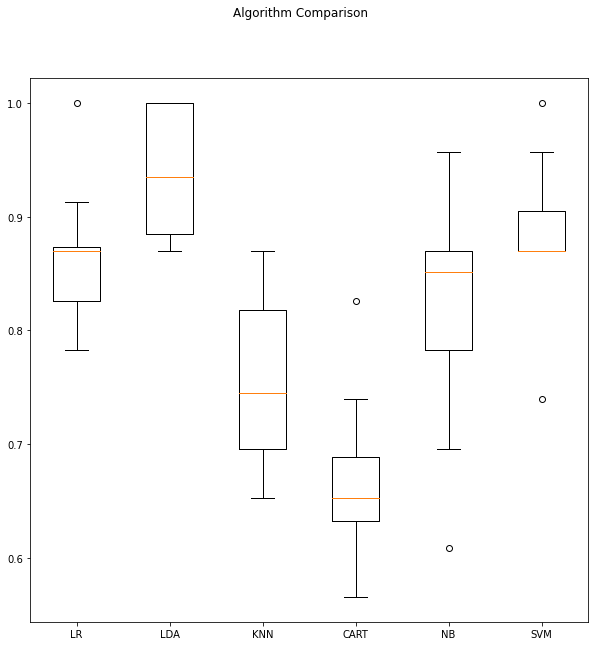

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.857246 (0.062071)
ScaledLDA: 0.939674 (0.055020)
ScaledKNN: 0.763043 (0.047502)
ScaledCART: 0.642029 (0.080965)
ScaledNB: 0.814312 (0.095810)
ScaledSVM: 0.874275 (0.056782)


In [ ]:
# LR
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'elasticnet', 'l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(solver= solver, penalty = penalty, C = C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Best: 0.904710 using {'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}
0.896196 (0.044743) with: {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
0.904710 (0.050778) with: {'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.001, 'penalty': 'none', 'solver': 'liblinear'}
0.887500 (0.055533) with: {'C': 0.001, 'penalty': 'none', 'solver': 'sag'}
0.883152 (0.067411) with: {'C': 0.001, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.168478 (0.053624) with: {'C': 0.001, 'pena

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [ ]:
# LDA
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
shrinkage_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.05,0.25,0.15,0.35,0.45,0.55,0.65,0.75, 0.85,0.95]
solver_values = ['svd', 'lsqr', 'eigen']
param_grid = dict(shrinkage=shrinkage_values, solver = solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948188 using {'shrinkage': 0.05, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.943841 (0.047607) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.943841 (0.047607) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.943659 (0.051676) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.943659 (0.051676) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.943659 (0.055213) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.943659 (0.055213) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.943659 (0.055213) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.943659 (0.055213) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.922283 (0.046909) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.922283 (0.046909) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': '

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
190 fits failed out of a total of 570.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_

In [ ]:
# SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.887500 using {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.327899 (0.136852) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.383877 (0.163434) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.327899 (0.136852) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.327899 (0.136852) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.327899 (0.136852) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.362138 (0.133367) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.865580 (0.060072) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.840036 (0.055978) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.327899 (0.136852) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.327899 (0.136852) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.379529 (0.136010) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.870109 (0.061509) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.882971 (0.055378) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.844203 (0.056596) with: {'C': 10, 'gamma': 0.001, 'kern

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, Y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.0533669923120631}

## Ensembles

In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.517391 (0.082204)
GBM: 0.732428 (0.094565)
RF: 0.792391 (0.075146)
ET: 0.826630 (0.083168)


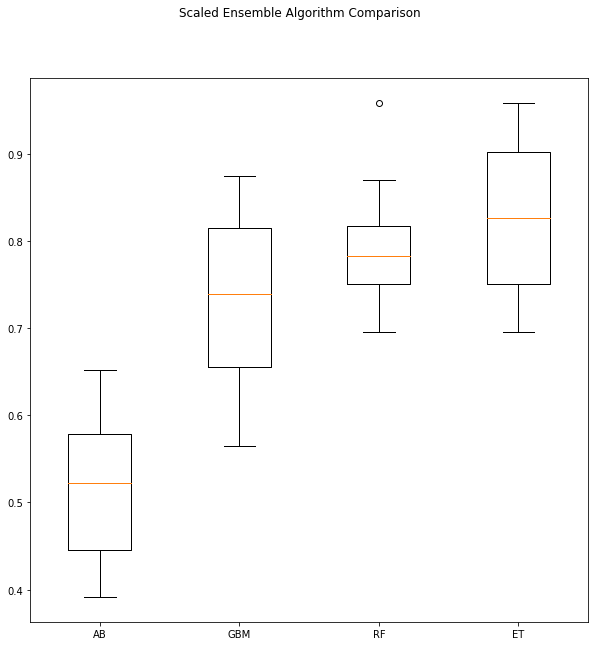

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 250, 300, 350, 400, 500, 450, 390, 410]))
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.822645 using {'n_estimators': 450}
0.788406 (0.086281) with: {'n_estimators': 50}
0.801268 (0.096277) with: {'n_estimators': 100}
0.788043 (0.086643) with: {'n_estimators': 150}
0.783696 (0.076381) with: {'n_estimators': 200}
0.783696 (0.071259) with: {'n_estimators': 250}
0.805254 (0.081321) with: {'n_estimators': 300}
0.813949 (0.087498) with: {'n_estimators': 350}
0.813949 (0.078382) with: {'n_estimators': 400}
0.818297 (0.067298) with: {'n_estimators': 500}
0.822645 (0.086101) with: {'n_estimators': 450}
0.818297 (0.082447) with: {'n_estimators': 390}
0.818297 (0.086911) with: {'n_estimators': 410}


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 60, 65, 50, 48, 49, 51, 52]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.809420 using {'n_estimators': 60}
0.779167 (0.092878) with: {'n_estimators': 35}
0.783696 (0.085710) with: {'n_estimators': 40}
0.788225 (0.077423) with: {'n_estimators': 45}
0.800906 (0.108498) with: {'n_estimators': 55}
0.809420 (0.113842) with: {'n_estimators': 60}
0.805072 (0.108862) with: {'n_estimators': 65}
0.801268 (0.081001) with: {'n_estimators': 50}
0.801268 (0.085541) with: {'n_estimators': 48}
0.796739 (0.085113) with: {'n_estimators': 49}
0.805435 (0.081470) with: {'n_estimators': 51}
0.805435 (0.081470) with: {'n_estimators': 52}


# Training - Testing

## LG

In [ ]:
modelLG= LogisticRegression(C = 0.001, penalty = 'none', solver = 'lbfgs')
modelLG.fit(X_train, Y_train)
predictions = modelLG.predict(X_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(accuracy_score(Y_train, modelLG.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
.8153846153846154

1.0
0.7966101694915254
[[ 9  3  0  0  0]
 [ 0 12  1  0  0]
 [ 0  4 11  0  0]
 [ 0  0  0  9  3]
 [ 0  0  0  1  6]]
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        12
         1.0       0.63      0.92      0.75        13
         2.0       0.92      0.73      0.81        15
         3.0       0.90      0.75      0.82        12
         4.0       0.67      0.86      0.75         7

    accuracy                           0.80        59
   macro avg       0.82      0.80      0.80        59
weighted avg       0.84      0.80      0.80        59



## GaussianNB

In [ ]:
modelNB = GaussianNB(var_smoothing = 0.0533669923120631)
modelNB.fit(X_train, Y_train)
predictions = modelNB.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelNB.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9008620689655172
0.8983050847457628
[[12  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 14  1  0]
 [ 0  0  2  8  2]
 [ 0  0  0  1  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        13
         2.0       0.88      0.93      0.90        15
         3.0       0.80      0.67      0.73        12
         4.0       0.75      0.86      0.80         7

    accuracy                           0.90        59
   macro avg       0.89      0.89      0.89        59
weighted avg       0.90      0.90      0.90        59



## SVM

In [ ]:
modelSVM= SVC(C = 1000, gamma = 0.01, kernel = 'rbf')
modelSVM.fit(X_train, Y_train)
predictions = modelSVM.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelSVM.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
0.9152542372881356
[[12  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  1 13  1  0]
 [ 0  0  1 11  0]
 [ 0  0  0  2  5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.93      1.00      0.96        13
         2.0       0.93      0.87      0.90        15
         3.0       0.79      0.92      0.85        12
         4.0       1.00      0.71      0.83         7

    accuracy                           0.92        59
   macro avg       0.93      0.90      0.91        59
weighted avg       0.92      0.92      0.91        59



## LDA

In [ ]:
modelLDA = LinearDiscriminantAnalysis(shrinkage = 0.05, solver = 'lsqr')
modelLDA.fit(X_train, Y_train)
predictions = modelLDA.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelLDA.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
0.8923076923076924

0.9827586206896551
0.9152542372881356
[[11  1  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 14  1  0]
 [ 0  0  2 10  0]
 [ 0  0  0  1  6]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        12
         1.0       0.93      1.00      0.96        13
         2.0       0.88      0.93      0.90        15
         3.0       0.83      0.83      0.83        12
         4.0       1.00      0.86      0.92         7

    accuracy                           0.92        59
   macro avg       0.93      0.91      0.92        59
weighted avg       0.92      0.92      0.92        59



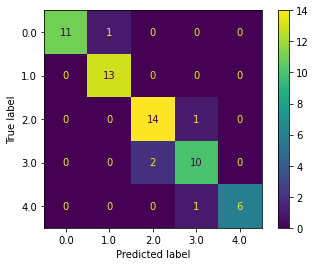

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_validation, predictions, labels=modelLDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelLDA.classes_)
disp.plot()
plt.show()

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
#TN= cm.values.sum() - (FP + FN + TP)
print(FP)
print(FN)
print(TP)
#print(TN)

[0 1 2 2 0]
[1 0 1 2 1]
[11 13 14 10  6]


## ExtraTreesClassifier

In [ ]:
modelET = ExtraTreesClassifier(n_estimators = 450)
modelET.fit(X_train, Y_train)
predictions = modelET.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelET.predict(X_train)))
print(accuracy_score(Y_validation, predictions)) 
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
0.864406779661017
[[11  1  0  0  0]
 [ 1 12  0  0  0]
 [ 0  2 13  0  0]
 [ 0  0  3  9  0]
 [ 0  0  1  0  6]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        12
         1.0       0.80      0.92      0.86        13
         2.0       0.76      0.87      0.81        15
         3.0       1.00      0.75      0.86        12
         4.0       1.00      0.86      0.92         7

    accuracy                           0.86        59
   macro avg       0.90      0.86      0.87        59
weighted avg       0.88      0.86      0.87        59



## RandomForestClassifier

In [ ]:
modelRF = RandomForestClassifier(random_state=seed, n_estimators=60)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelRF.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
0.864406779661017
[[11  1  0  0  0]
 [ 1 12  0  0  0]
 [ 0  1 13  1  0]
 [ 0  0  3  9  0]
 [ 0  0  1  0  6]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        12
         1.0       0.86      0.92      0.89        13
         2.0       0.76      0.87      0.81        15
         3.0       0.90      0.75      0.82        12
         4.0       1.00      0.86      0.92         7

    accuracy                           0.86        59
   macro avg       0.89      0.86      0.87        59
weighted avg       0.87      0.86      0.86        59



# Testing

In [ ]:
test = pd.read_excel('/content/drive/MyDrive/NCKH Depression/Dataset/Education test.xlsx')
test.head()

,Họ và tên bạn là gì?,Ngày sinh của bạn là?,Hiện tại bạn là?,Giới tính sinh học của bạn là:,Bạn có thuộc cộng đồng LGBT không?,1. Bạn là người có xu hướng:,2. Bạn có cảm thấy bản thân mình thừa thãi không?,"3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?",4. Bạn đang tự ti?,"5. Bạn có hay vận động thể dục, thể thao không?",...,"1. Bạn đột nhiên ăn quá nhiều hoặc chán ăn, biếng ăn?","2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?","4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?","3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?",5. Bạn không thể tập trung khi làm việc?,"7. Bạn luôn cảm thấy chán nản, kiệt sức, tuyệt vọng?","6. Bạn mất tự tin vào bản thân, thất vọng về bản thân và cả gia đình?",8. Bạn ít thấy hứng thú hoặc không tìm thấy niềm vui trong mọi việc?,"9. Bạn có suy nghĩ tiêu cực, muốn làm tổn thương bản thân thậm chí có suy nghĩ tự sát?",Tổng điểm
0,Nguyễn Bình Phương Nhi,2002-08-04 00:00:00,Sinh viên năm 2,Nữ,Không,Vừa hướng nội vừa hướng ngoại,Một chút,Có,Có,Một chút,...,1,1,0,0,1,1,2,2,0,8
1,Trần Thu Hiền,2001-06-01 00:00:00,Sinh viên năm 3,Nữ,Không,Hướng ngoại,Có,Một chút,Có,Một chút,...,3,3,2,3,2,3,3,1,1,21
2,PHẠM LÊ MINH ANH,23/10/2001,Sinh viên năm 3,Nữ,Không,Hướng nội,Có,Có,Có,Một chút,...,3,3,3,3,3,3,1,3,3,25
3,NaN,24/07/2001,Sinh viên năm 3,Nữ,Không,Vừa hướng nội vừa hướng ngoại,Không,Một chút,Không,Một chút,...,1,2,0,3,1,0,1,0,0,8
4,1 cô bé trầm cảm sau môn học từ thất vọng sang...,2001-01-08 00:00:00,Sinh viên năm 3,Nữ,Không,Vừa hướng nội vừa hướng ngoại,Một chút,Một chút,Có,Không,...,2,2,3,3,3,3,3,3,3,25


In [ ]:
test.columns = ['Name', 'DoB', 'Job', 'Sex', 'LGBT', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 
                'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'Total']

In [ ]:
# Change values in total column to the rate of depression. Normal - Minimal - Mild - Medium - Severe.
test.Total =test.Total.replace({1: 0, 2: 0, 3: 0, 4: 0,
                                 5: 1, 6: 1, 7: 1, 8: 1, 9: 1,
                                 10: 2, 11: 2, 12: 2, 13: 2, 14: 2,
                                 15: 3, 16: 3, 17: 3, 18: 3, 19: 3,
                                 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4})

# LGBT
test.LGBT = test.LGBT.replace({'Có': 1,
                               'Không': 0,
                               'Chưa xác định': 0.5})

test.a2 = test.a2.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
test.a3 = test.a3.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
test.a4 = test.a4.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
#data.a5 = data.a5.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})
#data.a6 = data.a6.replace({'Có': 1, 'Một chút': 0.5, 'Không': 0})

# Question (B)
#data.b6 = data.b1.replace({'Phần lớn dành cho việc vui chơi': 0, 'Cân đối giữa học tập và vui chơi': 0.5, 'Phần lớn dành cho học tập': 1})
test.b15 = test.b15.replace({'Chưa từng': 0, 'Một - hai lần': 1, 'Khoảng năm lần': 2, 'Khoảng 10 lần': 3, 'Rất nhiều': 4, 'Mỗi ngày': 5})

# Fill null value with the most popular value.
test = test.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Drop the column Name
test = test.drop(columns=[ 'Name', 'DoB', 'a7', 'a8', 'Job', 'Sex', 'a5', 'a6', 'b5', 'b14','b7', 'b2', 'b9', 'b4', 'b1', 'b3', 'b6', 'a1','b10', 'b12', 'a2', 'a4', 'b15'])

In [ ]:
array = test.values
x = array[:,0:14]
y = array[:,14]

## LG

In [ ]:
modelLG= LogisticRegression(C = 0.001, penalty = 'none', solver = 'lbfgs')
modelLG.fit(X_train, Y_train)
predictions = modelLG.predict(x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.8153846153846154
[[ 6  2  0  0  0]
 [ 2 23  2  0  0]
 [ 0  2  9  3  0]
 [ 0  0  0  9  1]
 [ 0  0  0  0  6]]
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         8
         1.0       0.85      0.85      0.85        27
         2.0       0.82      0.64      0.72        14
         3.0       0.75      0.90      0.82        10
         4.0       0.86      1.00      0.92         6

    accuracy                           0.82        65
   macro avg       0.81      0.83      0.81        65
weighted avg       0.82      0.82      0.81        65



## SVM

In [ ]:
modelSVM= SVC(C = 1000, gamma = 0.01, kernel = 'rbf')
modelSVM.fit(X_train, Y_train)
predictions = modelSVM.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.9384615384615385
[[ 8  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 12  2  0]
 [ 0  0  2  8  0]
 [ 0  0  0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        27
         2.0       0.86      0.86      0.86        14
         3.0       0.80      0.80      0.80        10
         4.0       1.00      1.00      1.00         6

    accuracy                           0.94        65
   macro avg       0.93      0.93      0.93        65
weighted avg       0.94      0.94      0.94        65



## LDA

In [ ]:
# import library
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
modelLDA = LinearDiscriminantAnalysis(shrinkage = 0.05, solver = 'lsqr')

modelLDA.fit(X_train, Y_train) # Fit model vào tệp train
predictions = modelLDA.predict(x) # Đưa array input X vào method predict() để dự đoán ra output kết quả

NameError: ignored

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.8923076923076924
[[ 7  1  0  0  0]
 [ 0 27  0  0  0]
 [ 0  4  8  2  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93         8
         1.0       0.84      1.00      0.92        27
         2.0       1.00      0.57      0.73        14
         3.0       0.83      1.00      0.91        10
         4.0       1.00      1.00      1.00         6

    accuracy                           0.89        65
   macro avg       0.94      0.89      0.90        65
weighted avg       0.91      0.89      0.88        65



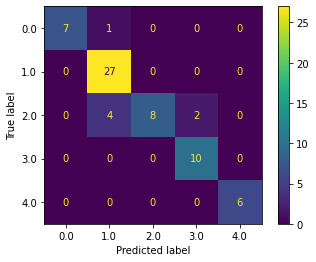

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

cm = confusion_matrix(y, predictions, labels=modelLDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelLDA.classes_)
t=disp.plot()
plt.show()

In [ ]:
cfm_plot = plot_confusion_matrix(<estimator>, <X>, <Y>)
cfm_plot.savefig("cfm.png")

## NB

In [ ]:
modelNB = GaussianNB(var_smoothing = 0.0533669923120631)
modelNB.fit(X_train, Y_train)
predictions = modelNB.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.7230769230769231
[[ 6  2  0  0  0]
 [ 0 22  5  0  0]
 [ 0  3  7  4  0]
 [ 0  0  3  7  0]
 [ 0  0  0  1  5]]
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         8
         1.0       0.81      0.81      0.81        27
         2.0       0.47      0.50      0.48        14
         3.0       0.58      0.70      0.64        10
         4.0       1.00      0.83      0.91         6

    accuracy                           0.72        65
   macro avg       0.77      0.72      0.74        65
weighted avg       0.74      0.72      0.73        65



## ET

In [ ]:
modelET = ExtraTreesClassifier(n_estimators = 450)
modelET.fit(X_train, Y_train)
predictions = modelET.predict(x)

In [ ]:
print(accuracy_score(y, predictions)) 
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.676923076923077
[[ 6  2  0  0  0]
 [ 1 21  5  0  0]
 [ 0  3  6  5  0]
 [ 0  0  4  5  1]
 [ 0  0  0  0  6]]
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80         8
         1.0       0.81      0.78      0.79        27
         2.0       0.40      0.43      0.41        14
         3.0       0.50      0.50      0.50        10
         4.0       0.86      1.00      0.92         6

    accuracy                           0.68        65
   macro avg       0.68      0.69      0.69        65
weighted avg       0.68      0.68      0.68        65



## RF

In [ ]:
modelRF = RandomForestClassifier(random_state=seed, n_estimators=60)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(x)

In [ ]:
print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.6615384615384615
[[ 6  2  0  0  0]
 [ 1 23  3  0  0]
 [ 0  4  3  7  0]
 [ 0  0  3  6  1]
 [ 0  0  0  1  5]]
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80         8
         1.0       0.79      0.85      0.82        27
         2.0       0.33      0.21      0.26        14
         3.0       0.43      0.60      0.50        10
         4.0       0.83      0.83      0.83         6

    accuracy                           0.66        65
   macro avg       0.65      0.65      0.64        65
weighted avg       0.65      0.66      0.65        65

